In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
%matplotlib inline

Collecting data on a different companies (realised volatility, cashflow to debt ratio and default risk status)

In [19]:
df=pd.read_csv('../Data/DataKDE.csv')

In [20]:
print('There are ',len(df),' companies in the dataset')
print('A sample:')
df.tail()

There are  482  companies in the dataset
A sample:


,Name,Realised 1yr Vol,CF2Debt Ratio,DefaultRisk
477,K+S AG,36.53,-0.40,High
478,Lundin Petroleum AB,29.05,-0.48,High
479,UnipolSai SpA,29.79,-0.49,Low
480,Capital & Counties Properties PLC,17.62,-0.55,Low
481,TNT Express NV,32.70,-0.77,High


Not overly happy with the column names in the csv file, so let's see if we can change them :
into ' Volatility ' and 'FCF2Debt '

In [21]:
df.columns=['Name', 'Volatility', 'CF2Debt', 'DefaultRisk']

In [22]:
print('Default Categories:')
print(df['DefaultRisk'].unique())

Default Categories:
['Low' 'High']


We use the groupby() function of Pandas to have some average position of the companies within the different default categories.

In [23]:
dfs=df.groupby('DefaultRisk')
type(dfs)


pandas.core.groupby.DataFrameGroupBy

In [24]:
#The grouped dataframe has the following properties 
AvgLevels=dfs[['Volatility','CF2Debt']].mean()
AvgLevels

,Volatility,CF2Debt
DefaultRisk,,
High,30.477500,0.075000
Low,23.226425,1.435894


<b>First Observation:</b><br>High Realized Equity Volatility and Low Free Cashflow is associated with High Default Risk

In [25]:
#Creating two dataFrames from the original dataframe df
df_HDefRisk=df[(df.DefaultRisk == 'High')]
df_LDefRisk=df[(df.DefaultRisk == 'Low')]
print(type(df_HDefRisk))
print(("The average realized equity volatility of Low Default is : {k: 0.02f}").format(k=df_LDefRisk['Volatility'].mean()))
print("(This result matches what we found when earlier grouping the dataframe)")

<class 'pandas.core.frame.DataFrame'>
The average realized equity volatility of Low Default is :  23.23
(This result matches what we found when earlier grouping the dataframe)


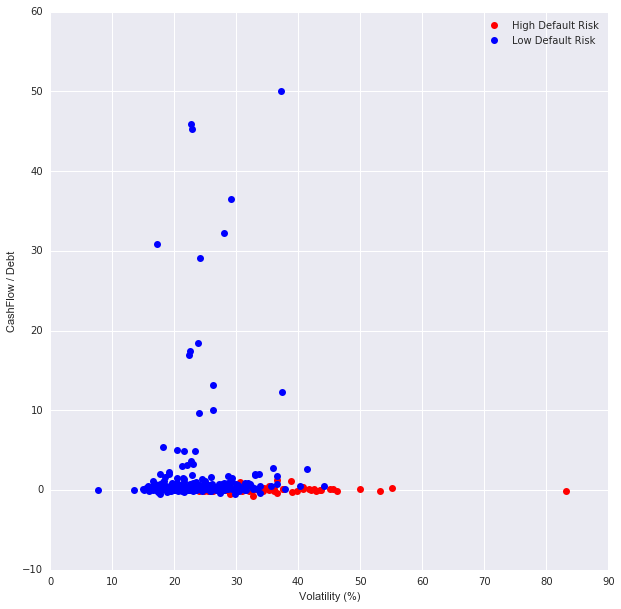

In [27]:
plt.figure(figsize=(10,10) )
plt.plot(df_HDefRisk.Volatility,df_HDefRisk.CF2Debt,'or',label='High Default Risk')
plt.plot(df_LDefRisk.Volatility,df_LDefRisk.CF2Debt,'ob',label='Low Default Risk')
plt.legend()
plt.xlabel('Volatility (%)')
plt.ylabel('CashFlow / Debt');

The Multivariate kernel density estimator from the <b>statsmodels </b> package is going to be used. 
We can find more info on the model using the "?" in front of the function

In [31]:
KDE_HighDefaultRisk=sm.nonparametric.KDEMultivariate(data=[df_HDefRisk.Volatility,df_HDefRisk.CF2Debt],
                                                     var_type='cc')
KDE_LowDefaultRisk=sm.nonparametric.KDEMultivariate(data=[df_LDefRisk.Volatility,df_LDefRisk.CF2Debt],
                                                    var_type='cc')

A company has an equity volatility of 20% and a Cashflow to debt ratio of 1%. Which is the most likely category: High or Low default risk ?<br>

In [32]:
#low free cashflow is creating high default risk
print(KDE_LowDefaultRisk.pdf([20,1]))
print(KDE_HighDefaultRisk.pdf([20,1]))

0.013090641803160831
0.000107063991959003


What are the different bandwidths ?

In [33]:
print(KDE_HighDefaultRisk.bw)
print(KDE_LowDefaultRisk.bw)

[4.0105288  0.10812561]
[1.92194748 2.2855728 ]
